<a href="https://colab.research.google.com/github/Xin-overclocked/pns/blob/main/huisan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind


In [141]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Section 1: Define Your Research Question and Dataset**


*   Clearly state your research question
*   Briefly describe your dataset, including its source, the main variables, sample size, and any limitations.

**Research Questions**


1.   How does the age of athletes influence their likelihood of winning a medal in the Olympics across various sports?
2.   To what extent does an athlete's weight impact their chances of securing a medal in the Olympics, considering different sports categories?

In [147]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/athlete_events.csv')

In [146]:
df

,Sport,Age,Weight,Medal
0,Basketball,24.0,80.0,NaN
1,Judo,23.0,60.0,NaN
4,Speed Skating,21.0,82.0,NaN
5,Speed Skating,21.0,82.0,NaN
6,Speed Skating,25.0,82.0,NaN
...,...,...,...,...
271111,Luge,29.0,89.0,NaN
271112,Ski Jumping,27.0,59.0,NaN
271113,Ski Jumping,27.0,59.0,NaN
271114,Bobsleigh,30.0,96.0,NaN


In [150]:
# Select only the 'Age', 'Weight', and 'Medal' columns
df = df[['Sport', 'Age', 'Weight', 'Medal']]

# Handle missing values
df = df.dropna(subset=['Sport', 'Age', 'Weight'])


**Source:**

The dataset is sourced from Kaggle and it contains information on Olympic athletes.  The specific file used is 'athlete_events.csv'.

**Main Variables:**

The dataset includes key variables such as athlete information (ID, name, sex, age, height, weight), game details (year, season, city), sport and event information, and medal outcomes (gold, silver, bronze).

**Limitations:**

* Missing Data:  The presence of missing values (NaNs) in columns like 'Age', 'Height', and 'Weight' may introduce bias or necessitate imputation.

* Data Accuracy:  Data accuracy from historical sources may vary.

* Representativeness: The dataset may not accurately represent all athletes who have ever participated in the Olympics throughout history.

* Scope: Limited to recorded data points in the dataset and may not cover all aspects of an athlete's performance or contextual factors.


In [151]:
print(f"Sample Size: {df.shape[0]}")

Sample Size: 207379


In [104]:
df

,Sport,Age,Weight,Medal
40,Ice Hockey,28.0,85.0,Bronze
41,Gymnastics,28.0,64.0,Bronze
42,Gymnastics,28.0,64.0,Gold
44,Gymnastics,28.0,64.0,Gold
48,Gymnastics,28.0,64.0,Gold
...,...,...,...,...
271078,Athletics,25.0,80.0,Silver
271080,Athletics,33.0,80.0,Bronze
271082,Fencing,28.0,82.0,Bronze
271102,Athletics,19.0,64.0,Bronze


from matplotlib import pyplot as plt
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Weight'].plot(kind='hist', bins=20, title='Weight')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Medal_Numeric'].plot(kind='hist', bins=20, title='Medal_Numeric')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Age', y='Weight', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Weight', y='Medal_Numeric', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Medal_Binary']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Medal_Binary', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Medal_Binary')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Medal_Binary']
  ys = series['Weight']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Medal_Binary', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Medal_Binary')
_ = plt.ylabel('Weight')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Medal_Binary']
  ys = series['Medal_Numeric']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Medal_Binary', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Medal_Binary')
_ = plt.ylabel('Medal_Numeric')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Medal_Binary']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Medal_Binary'}, axis=1)
              .sort_values('Medal_Binary', ascending=True))
  xs = counted['Medal_Binary']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Medal_Binary', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Medal_Binary')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
df['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Weight'].plot(kind='line', figsize=(8, 4), title='Weight')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Medal_Numeric'].plot(kind='line', figsize=(8, 4), title='Medal_Numeric')
plt.gca().spines[['top', 'right']].set_visible(False)

# **Section 2: Summarize Key Data with Descriptive Statistics**



* Present summary statistics (mean, median, variance, etc.) visually using bar charts, pie charts, or histograms.
* Highlight any interesting patterns or trends you observe in the data.



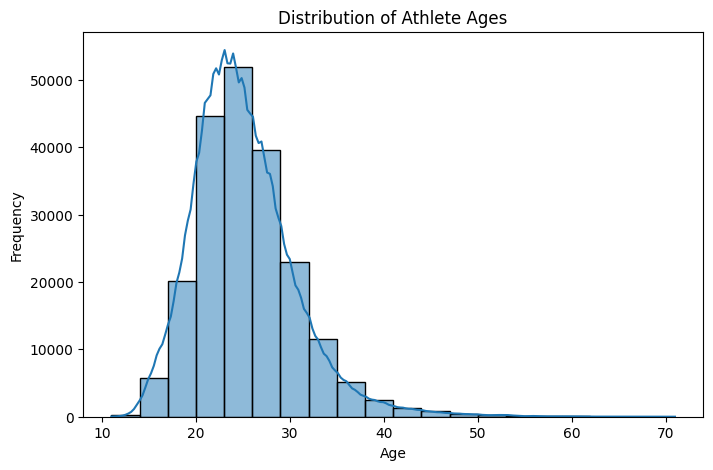

In [152]:
# 1. Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Athlete Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

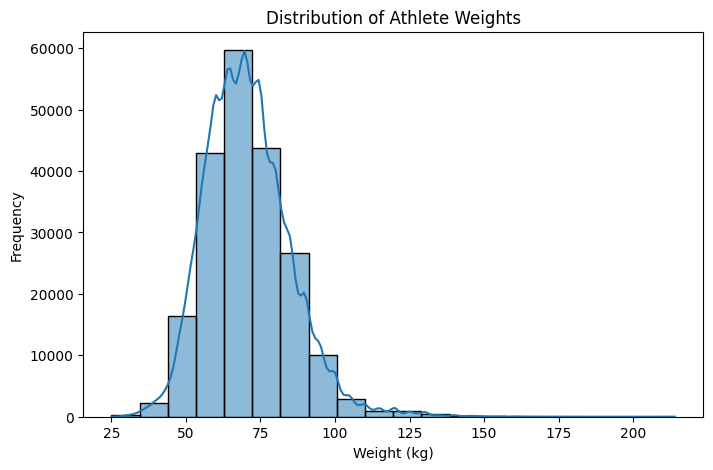

In [153]:
# 2. Weight Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Weight'], bins=20, kde=True)
plt.title('Distribution of Athlete Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.show()

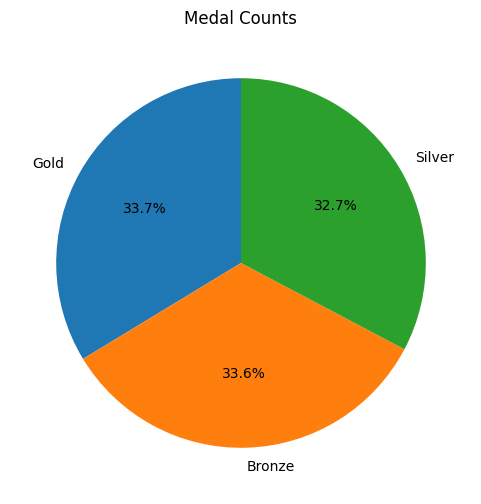

In [154]:
# 3. Medal Proportion
medal_counts = df['Medal'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(medal_counts, labels=medal_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Medal Counts')
plt.show()

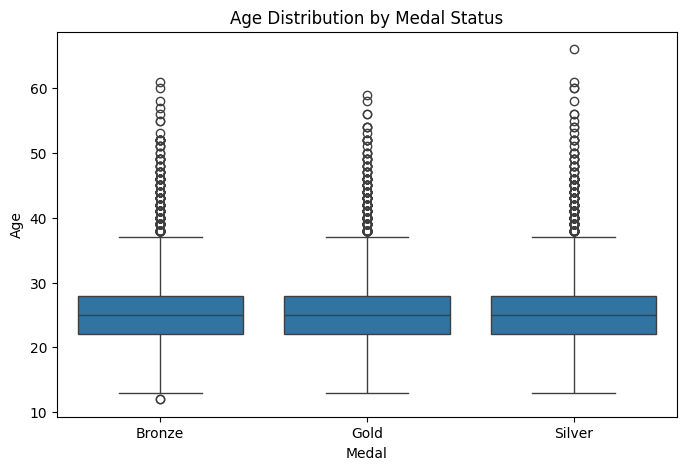

In [155]:
# 4. Age vs. Medal (Box Plot)
plt.figure(figsize=(8, 5))
sns.boxplot(x='Medal', y='Age', data=df)
plt.title('Age Distribution by Medal Status')
plt.xlabel('Medal')
plt.ylabel('Age')
plt.show()

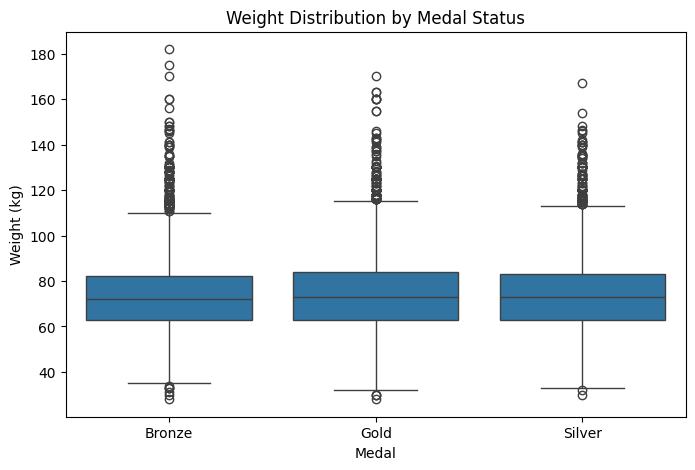

In [156]:
# 5. Weight vs. Medal (Box Plot)
plt.figure(figsize=(8, 5))
sns.boxplot(x='Medal', y='Weight', data=df)
plt.title('Weight Distribution by Medal Status')
plt.xlabel('Medal')
plt.ylabel('Weight (kg)')
plt.show()

# **Section 3: Conduct a Probability Analysis**





* Calculate and visualize the probability of a key outcome (e.g., probability of customer satisfaction above a certain threshold, or probability of achieving a top score).
* Explain the significance of these probabilities in relation to your research question



# **Section 4: Perform Hypothesis Testing**

* State and test a hypothesis related to your research question
* Show your results visually (e.g., p-values, confidence intervals) and briefly summarize your findings.

## RQ1:

How does the age of athletes influence their likelihood of winning a medal in the Olympics across various sports?

**Hypothesis**

Null Hypothesis (H0): There is no significant relationship between the age of athletes and their likelihood of winning a medal in the Olympics.

Alternative Hypothesis (H1): There is a significant relationship between the age of athletes and their likelihood of winning a medal in the Olympics.

T-statistic (Age): 12.788271812503153
P-value (Age): 1.96988488028913e-37


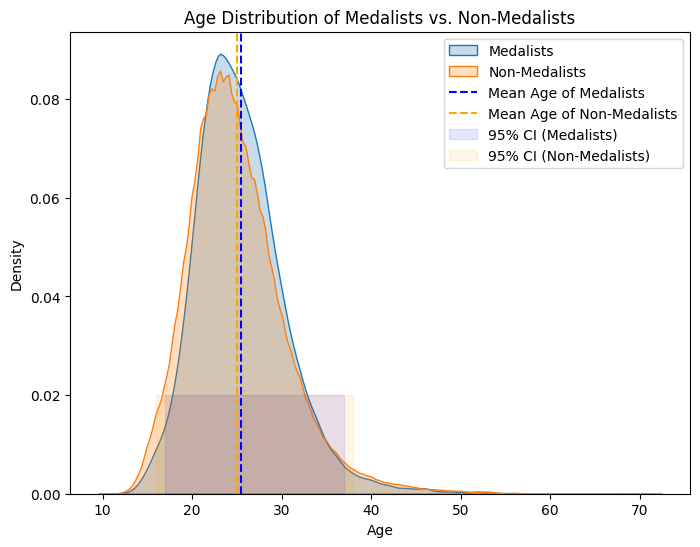

Reject the null hypothesis. There is a significant difference in age between medalists and non-medalists.


In [164]:
from scipy.stats import ttest_ind

# Perform an independent samples t-test for Age
t_stat_age, p_value_age = ttest_ind(medalists['Age'], non_medalists['Age'])

# Print the results for age
print(f"T-statistic (Age): {t_stat_age}")
print(f"P-value (Age): {p_value_age}")

# Visualize the results with a plot (Age distribution)
plt.figure(figsize=(8, 6))

# Plotting Kernel Density Estimation (KDE) for age distribution
sns.kdeplot(medalists['Age'], label='Medalists', fill=True)
sns.kdeplot(non_medalists['Age'], label='Non-Medalists', fill=True)

# Plotting the mean age as vertical lines
plt.axvline(x=medalists['Age'].mean(), color='blue', linestyle='--', label='Mean Age of Medalists')
plt.axvline(x=non_medalists['Age'].mean(), color='orange', linestyle='--', label='Mean Age of Non-Medalists')

# Plotting Confidence Interval (95%) for the mean
medalists_ci = np.percentile(medalists['Age'], [2.5, 97.5])
non_medalists_ci = np.percentile(non_medalists['Age'], [2.5, 97.5])

# Plotting the confidence interval as shaded areas
plt.fill_betweenx([0, 0.02], medalists_ci[0], medalists_ci[1], color='blue', alpha=0.1, label='95% CI (Medalists)')
plt.fill_betweenx([0, 0.02], non_medalists_ci[0], non_medalists_ci[1], color='orange', alpha=0.1, label='95% CI (Non-Medalists)')

# Labeling the axes and title
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution of Medalists vs. Non-Medalists')

# Adding legend
plt.legend()

# Show the plot
plt.show()

# Summarize the findings for age
alpha = 0.05
if p_value_age < alpha:
    print("Reject the null hypothesis. There is a significant difference in age between medalists and non-medalists.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in age between medalists and non-medalists.")


## RQ2:
To what extent does an athlete's weight impact their chances of securing a medal in the Olympics, considering different sports categories?

Null Hypothesis (H₀): An athlete's weight does not significantly impact their chances of securing a medal in the Olympics, across different sports categories.

Alternative Hypothesis (H₁): An athlete's weight significantly impacts their chances of securing a medal in the Olympics, across different sports categories.


T-statistic (Weight): 40.444028078085346
P-value (Weight): 0.0


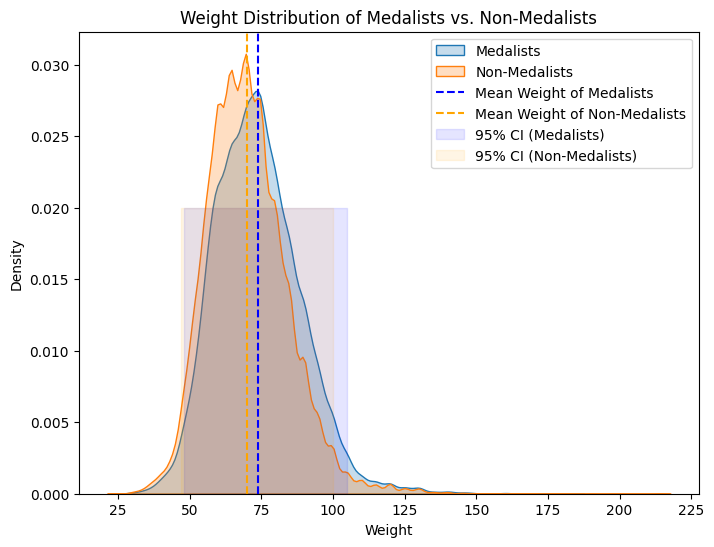

Reject the null hypothesis. There is a significant difference in weight between medalists and non-medalists.


In [165]:
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Perform an independent samples t-test for Weight
t_stat_weight, p_value_weight = ttest_ind(medalists['Weight'], non_medalists['Weight'])

# Print the results for weight
print(f"T-statistic (Weight): {t_stat_weight}")
print(f"P-value (Weight): {p_value_weight}")

# Visualize the results with a plot (Weight distribution)
plt.figure(figsize=(8, 6))

# Plotting Kernel Density Estimation (KDE) for weight distribution
sns.kdeplot(medalists['Weight'], label='Medalists', fill=True)
sns.kdeplot(non_medalists['Weight'], label='Non-Medalists', fill=True)

# Plotting the mean weight as vertical lines
plt.axvline(x=medalists['Weight'].mean(), color='blue', linestyle='--', label='Mean Weight of Medalists')
plt.axvline(x=non_medalists['Weight'].mean(), color='orange', linestyle='--', label='Mean Weight of Non-Medalists')

# Plotting Confidence Interval (95%) for the mean
medalists_ci = np.percentile(medalists['Weight'], [2.5, 97.5])
non_medalists_ci = np.percentile(non_medalists['Weight'], [2.5, 97.5])

# Plotting the confidence interval as shaded areas
plt.fill_betweenx([0, 0.02], medalists_ci[0], medalists_ci[1], color='blue', alpha=0.1, label='95% CI (Medalists)')
plt.fill_betweenx([0, 0.02], non_medalists_ci[0], non_medalists_ci[1], color='orange', alpha=0.1, label='95% CI (Non-Medalists)')

# Labeling the axes and title
plt.xlabel('Weight')
plt.ylabel('Density')
plt.title('Weight Distribution of Medalists vs. Non-Medalists')

# Adding legend
plt.legend()

# Show the plot
plt.show()

# Summarize the findings for weight
alpha = 0.05
if p_value_weight < alpha:
    print("Reject the null hypothesis. There is a significant difference in weight between medalists and non-medalists.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in weight between medalists and non-medalists.")